In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [31]:
df = pd.read_excel('C:/Users/USER11/Desktop/DataScience/Superstore.xls') 

In [32]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [33]:
df.shape

(9994, 21)

In [34]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [35]:
  df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [36]:
  df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [37]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Exploratory Data Analysis

# <h4> what is the overall sales trends? 

In [47]:
df['Order Date'].min()

Timestamp('2014-01-03 00:00:00')

In [48]:
df['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

In [50]:
#getting month year from the dataset
df['month_year'] = df['Order Date'].apply( lambda x : x.strftime('%Y-%m'))

In [51]:
df['month_year']

0       2016-11
1       2016-11
2       2016-06
3       2015-10
4       2015-10
         ...   
9989    2014-01
9990    2017-02
9991    2017-02
9992    2017-02
9993    2017-05
Name: month_year, Length: 9994, dtype: object

In [62]:
#grouping month year
df_trend = df.groupby('month_year').sum()['Sales'].reset_index()
df_trend

,month_year,Sales
0,2014-01,14236.8950
1,2014-02,4519.8920
2,2014-03,55691.0090
3,2014-04,28295.3450
4,2014-05,23648.2870
5,2014-06,34595.1276
6,2014-07,33946.3930
7,2014-08,27909.4685
8,2014-09,81777.3508
9,2014-10,31453.3930


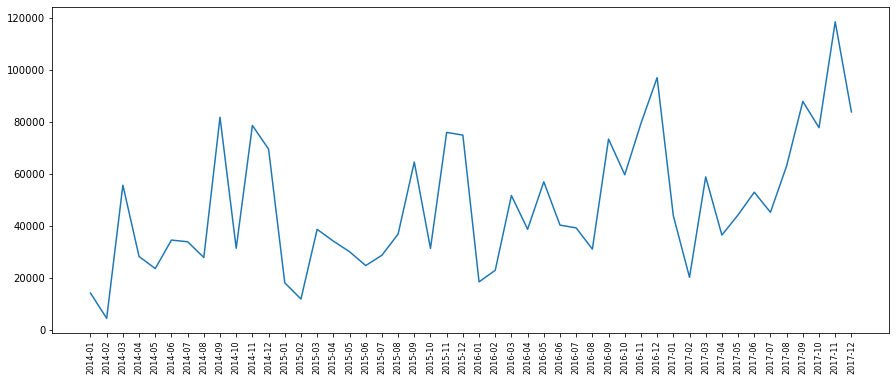

In [66]:
# Setting plot 
plt.figure(figsize=(15,6))
plt.plot(df_trend['month_year'], df_trend['Sales'])
plt.xticks(rotation='vertical', size=8)
plt.show()

# <h4> Which are the top 10 products in sales

In [73]:
#grouping the Product names with sales
prod_sales = pd.DataFrame(df.groupby('Product Name').sum() ['Sales']) 

In [77]:
#Sorting prod_sales column
prod_sales = prod_sales.sort_values('Sales', ascending=False)

In [79]:
#Top 10 Products by Sales
prod_sales[:10]

,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
HON 5400 Series Task Chairs for Big and Tall,21870.576
GBC DocuBind TL300 Electric Binding System,19823.479
GBC Ibimaster 500 Manual ProClick Binding System,19024.500
Hewlett Packard LaserJet 3310 Copier,18839.686
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.895
GBC DocuBind P400 Electric Binding System,17965.068


# <h4> Which are the most selling products

In [85]:
#Grouping Product name 
most_sales_prod = pd.DataFrame(df.groupby('Product Name').sum() ['Quantity'])

In [88]:
#Sorting most selling products 
most_sales_prod = most_sales_prod.sort_values('Quantity', ascending = False )

In [90]:
most_sales_prod[:10]  

,Quantity
Product Name,
Staples,215
Staple envelope,170
Easy-staple paper,150
Staples in misc. colors,86
KI Adjustable-Height Table,74
Avery Non-Stick Binders,71
Storex Dura Pro Binders,71
GBC Premium Transparent Covers with Diagonal Lined Pattern,67
"Situations Contoured Folding Chairs, 4/Set",64


# <h4> What is the most preferred ship mode

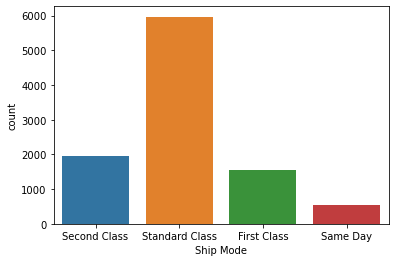

<Figure size 720x612 with 0 Axes>

In [95]:
#Plotting Ship Mode
sns.countplot(df['Ship Mode'])
plt.figure(figsize=(10,8.5))
plt.show()

# <h4> Which are the most profitable category and sub-category

In [104]:
#Grouping Category & Sub-Category
cat_subcat_profit = pd.DataFrame(df.groupby(['Category', 'Sub-Category']).sum() ['Profit'])

In [105]:
#Sorting the result
cat_subcat_profit.sort_values(['Category','Profit'], ascending=False)

Profit
Category        Sub-Category            
Technology      Copiers       55617.8249
                Phones        44515.7306
                Accessories   41936.6357
                Machines       3384.7569
Office Supplies Paper         34053.5693
                Binders       30221.7633
                Storage       21278.8264
                Appliances    18138.0054
                Envelopes      6964.1767
                Art            6527.7870
                Labels         5546.2540
                Fasteners       949.5182
                Supplies      -1189.0995
Furniture       Chairs        26590.1663
                Furnishings   13059.1436
                Bookcases     -3472.5560
                Tables       -17725.4811

                                           End